Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection & Analysis

In [3]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('/Users/ahmedbinnayeem/Downloads/parkinsons (1).csv')

In [4]:
# printing the first 5 rows of the dataframe
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
# number of rows and columns in the dataframe
parkinsons_data.shape

(195, 24)

In [6]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [8]:
# getting some statistical measures about the data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [9]:
# distribution of target Variable
parkinsons_data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

1  --> Parkinson's Positive

0 --> Healthy


In [10]:
# grouping the data bas3ed on the target variable
parkinsons_data.groupby('status').mean()

TypeError: Could not convert phon_R01_S07_1phon_R01_S07_2phon_R01_S07_3phon_R01_S07_4phon_R01_S07_5phon_R01_S07_6phon_R01_S10_1phon_R01_S10_2phon_R01_S10_3phon_R01_S10_4phon_R01_S10_5phon_R01_S10_6phon_R01_S13_1phon_R01_S13_2phon_R01_S13_3phon_R01_S13_4phon_R01_S13_5phon_R01_S13_6phon_R01_S17_1phon_R01_S17_2phon_R01_S17_3phon_R01_S17_4phon_R01_S17_5phon_R01_S17_6phon_R01_S42_1phon_R01_S42_2phon_R01_S42_3phon_R01_S42_4phon_R01_S42_5phon_R01_S42_6phon_R01_S43_1phon_R01_S43_2phon_R01_S43_3phon_R01_S43_4phon_R01_S43_5phon_R01_S43_6phon_R01_S49_1phon_R01_S49_2phon_R01_S49_3phon_R01_S49_4phon_R01_S49_5phon_R01_S49_6phon_R01_S50_1phon_R01_S50_2phon_R01_S50_3phon_R01_S50_4phon_R01_S50_5phon_R01_S50_6 to numeric

Data Pre-Processing

Separating the features & Target

In [11]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)
y = parkinsons_data['status']

In [12]:

df['status'].value_counts()

NameError: name 'df' is not defined

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
y.value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [16]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy = 'minority')
X_sm,y_sm = oversample.fit_resample(X,y)

In [17]:
y_sm.value_counts()


status
1    147
0    147
Name: count, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size=0.2, random_state=42, stratify=y_sm)

In [19]:
y_train.value_counts()

status
1    118
0    117
Name: count, dtype: int64

In [20]:
y_test.value_counts()

status
0    30
1    29
Name: count, dtype: int64

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

/Users/anaconda3/envs/Python/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
LogisticRegressionScore = lr.score(X_test, y_test)
print("Accuracy obtained by Logistic Regression Model:",LogisticRegressionScore*100)

Accuracy obtained by Logistic Regression Model: 72.88135593220339


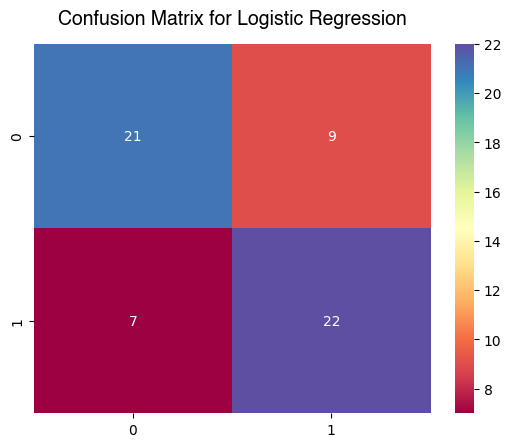

In [23]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_lr = lr.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cf_matrix, annot=True, cmap="Spectral")
plt.title("Confusion Matrix for Logistic Regression", fontsize=14, fontname="Helvetica", y=1.03);

In [24]:
 # Classification report of Logistic Regression
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72        30
           1       0.71      0.76      0.73        29

    accuracy                           0.73        59
   macro avg       0.73      0.73      0.73        59
weighted avg       0.73      0.73      0.73        59



In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
RandomForestClassifierScore = rfc.score(X_test, y_test)
print("Accuracy obtained by Random Forest Classifier Model:",RandomForestClassifierScore*100)

Accuracy obtained by Random Forest Classifier Model: 94.91525423728814


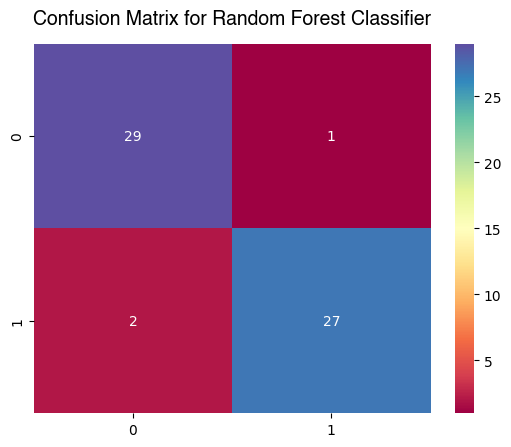

In [27]:
# Confusion Matrix

y_pred_rfc = rfc.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cf_matrix, annot=True, cmap="Spectral")
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [28]:
 # Classification report of Random Forest Classifier
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.96      0.93      0.95        29

    accuracy                           0.95        59
   macro avg       0.95      0.95      0.95        59
weighted avg       0.95      0.95      0.95        59



In [29]:
#from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier(4)
#knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [36]:
#KNeighborsClassifierScore = knn.score(X_test, y_test)
#print("Accuracy obtained by K Neighbors Classifier Model:",KNeighborsClassifierScore*100)

In [37]:
# Confusion Matrix

#y_pred_knn = knn.predict(X_test)
#cf_matrix = confusion_matrix(y_test, y_pred_knn)
#sns.heatmap(cf_matrix, annot=True, cmap="Spectral")
#plt.title("Confusion Matrix for K Neighbors Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [38]:
 # Classification report of K Neighbors Classifier
#from sklearn import metrics
#print(metrics.classification_report(y_test, y_pred_knn))

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [40]:
GradientBoostingClassifierScore = gb.score(X_test, y_test)
print("Accuracy obtained by Gradient Boosting Classifier Model:",GradientBoostingClassifierScore*100)

Accuracy obtained by Gradient Boosting Classifier Model: 98.30508474576271


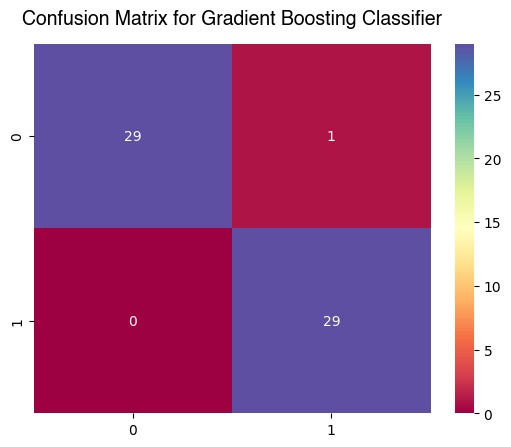

In [41]:
# Confusion Matrix

y_pred_gb = gb.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cf_matrix, annot=True, cmap="Spectral")
plt.title("Confusion Matrix for Gradient Boosting Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [42]:
 # Classification report of Gradient Boosting Classifier
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.97      1.00      0.98        29

    accuracy                           0.98        59
   macro avg       0.98      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59



In [43]:
from sklearn.tree import DecisionTreeClassifier


dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))


print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}")
print(f"Classification Report :- \n {classification_report(y_test,dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.8983050847457628 

Confusion Matrix :- 
[[26  4]
 [ 2 27]]
Classification Report :- 
               precision    recall  f1-score   support

           0       0.93      0.87      0.90        30
           1       0.87      0.93      0.90        29

    accuracy                           0.90        59
   macro avg       0.90      0.90      0.90        59
weighted avg       0.90      0.90      0.90        59



/var/folders/6r/jjvg0wj16hnbm7cqsm9h8c040000gn/T/ipykernel_9274/2778283421.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


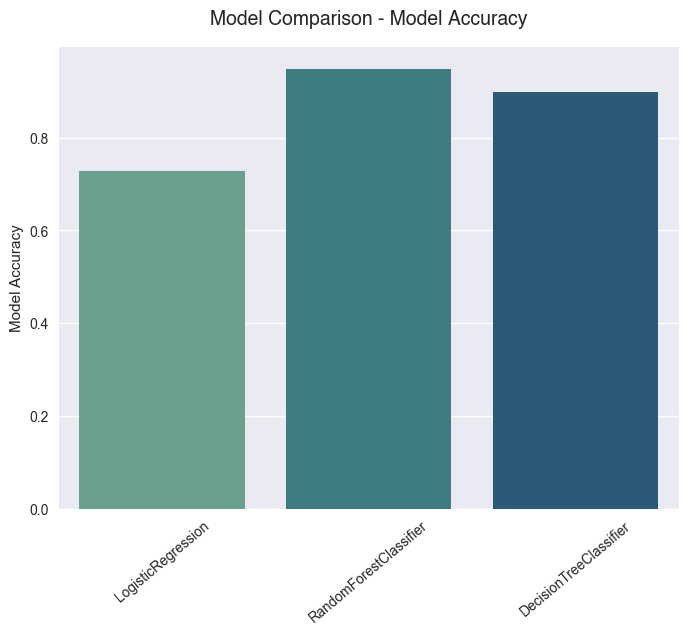

In [45]:
plt.style.use("seaborn")

x=["LogisticRegression", "RandomForestClassifier", 
   "DecisionTreeClassifier"]

y=[LogisticRegressionScore,RandomForestClassifierScore,
  dtc_acc]

fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(x=x, y=y, palette="crest");
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40)
plt.title("Model Comparison - Model Accuracy", fontsize=14, fontname="Helvetica", y=1.03);

In [46]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rfc.predict(input_data_reshaped)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")


[0]
The Person does not have Parkinsons Disease


/Users/anaconda3/envs/Python/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Saving the trained model

In [47]:
import pickle

In [48]:
filename = 'parkinsons_model.sav'
pickle.dump(rfc, open(filename, 'wb'))

In [49]:
# loading the saved model
loaded_model = pickle.load(open('parkinsons_model.sav', 'rb'))

In [50]:
for column in X.columns:
  print(column)

MDVP:Fo(Hz)
MDVP:Fhi(Hz)
MDVP:Flo(Hz)
MDVP:Jitter(%)
MDVP:Jitter(Abs)
MDVP:RAP
MDVP:PPQ
Jitter:DDP
MDVP:Shimmer
MDVP:Shimmer(dB)
Shimmer:APQ3
Shimmer:APQ5
MDVP:APQ
Shimmer:DDA
NHR
HNR
RPDE
DFA
spread1
spread2
D2
PPE


import matplotlib.pyplot as plt

# Classification report for algorithm 1
algo1_report = {'precision': [0.2, 0.6, 0.9],
                'recall': [0.8, 0.5, 0.1],
                'f1-score': [0.75, 0.84, 0.78]}

# Classification report for algorithm 2
algo2_report = {'precision': [0.7, 0.8, 0.6],
                'recall': [0.8, 0.7, 0.9],
                'f1-score': [0.74, 0.74, 0.7]}

# Classification report for algorithm 3
algo3_report = {'precision': [0.9, 0.8, 0.7],
                'recall': [0.6, 0.8, 0.9],
                'f1-score': [0.71, 0.79, 0.78]}

# Plot the bar graph
fig, ax = plt.subplots(figsize=(10, 6))
x = ['precision', 'recall', 'f1-score']
bar_width = 0.2
opacity = 0.8

# Set the positions of the bars on the x-axis
pos1 = list(range(len(x)))
pos2 = [x + bar_width for x in pos1]
pos3 = [x + bar_width for x in pos2]

# Plot the bars for each algorithm
ax.bar(pos1, algo1_report['precision'], bar_width, alpha=opacity, label='Algorithm 1')
ax.bar(pos2, algo2_report['precision'], bar_width, alpha=opacity, label='Algorithm 2')
ax.bar(pos3, algo3_report['precision'], bar_width, alpha=opacity, label='Algorithm 3')

# Add labels, title, and legend
ax.set_ylabel('Score')
ax.set_xlabel('Metric')
ax.set_title('Classification Report Scores by Algorithm')
ax.set_xticks([p + 1.5 * bar_width for p in pos1])
ax.set_xticklabels(x)
ax.legend()

plt.show()
